In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import pandas as pd

In [ ]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [ ]:
def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

In [ ]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [ ]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [ ]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [ ]:
def loss(A2,Y):
    
    logprobs = np.multiply(Y,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = -np.sum(logprobs)/len(Y)
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
    return cost

In [ ]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (loss(Af,y))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return Af#training_history

In [ ]:

y = pd.read_csv('X.csv',header=None)
X = pd.read_csv('y.csv',header=None)

In [ ]:
X.tail()

,0
995,9
996,9
997,9
998,9
999,9


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [ ]:
y[y!=1] = 0

In [ ]:
X = np.array(X)

In [ ]:
X = X.T

In [ ]:
X.shape

(1, 1000)

In [ ]:
y = y.T

In [ ]:
y = np.array(y)

100%|██████████| 1000/1000 [03:51<00:00,  4.32it/s]


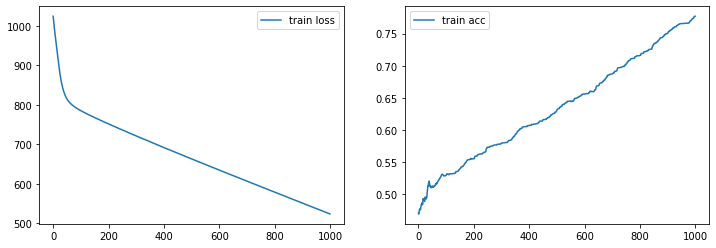

array([[0.33511122, 0.33511122, 0.33511122, ..., 0.32275168, 0.32275168,
        0.32275168],
       [0.23233355, 0.23233355, 0.23233355, ..., 0.22629071, 0.22629071,
        0.22629071],
       [0.27320666, 0.27320666, 0.27320666, ..., 0.28719336, 0.28719336,
        0.28719336],
       ...,
       [0.19570572, 0.19570572, 0.19570572, ..., 0.19250497, 0.19250497,
        0.19250497],
       [0.57578338, 0.57578338, 0.57578338, ..., 0.59777485, 0.59777485,
        0.59777485],
       [0.05879766, 0.05879766, 0.05879766, ..., 0.05526768, 0.05526768,
        0.05526768]])

In [ ]:
deep_neural_network(X, y, hidden_layers = (1, 16, 4), learning_rate = 0.001, n_iter = 1000)

In [ ]:
y.shape

(1, 150)

In [ ]:
y = np.ravel(y)

In [ ]:
y

array([7, 1, 2, 0, 1, 3, 0, 5, 5, 7, 4, 4, 9, 8, 9, 0, 9, 2, 7, 0, 1, 6,
       9, 5, 6, 8, 6, 7, 3, 5, 7, 8, 6, 6, 2, 4, 0, 9, 8, 4, 9, 6, 9, 6,
       2, 7, 7, 4, 7, 5, 0, 2, 5, 0, 7, 9, 9, 8, 0, 7, 3, 0, 7, 2, 6, 8,
       3, 3, 4, 4, 2, 2, 2, 7, 8, 7, 1, 8, 7, 8, 1, 3, 5, 7, 8, 3, 4, 0,
       9, 5, 7, 6, 0, 4, 9, 0, 2, 6, 5, 5, 4, 1, 3, 6, 3, 6, 2, 8, 5, 8,
       7, 4, 7, 6, 9, 8, 3, 2, 3, 6, 5, 7, 1, 8, 7, 8, 1, 2, 0, 1, 5, 0,
       8, 2, 2, 5, 3, 1, 5, 1, 0, 9, 3, 7, 0, 4, 5, 2, 5, 6, 8, 0, 6, 5,
       9, 9, 2, 0, 9, 4, 8, 8, 2, 5, 9, 5, 6, 8, 7, 9, 1, 9, 0, 9, 4, 6,
       8, 2, 1, 1, 8, 2, 7, 4, 2, 1, 1, 3, 6, 9, 3, 9, 8, 3, 1, 6, 0, 8,
       7, 9, 7, 6, 1, 7, 6, 3, 7, 2, 2, 1, 2, 3, 2, 9, 4, 6, 5, 9, 9, 5,
       3, 7, 0, 7, 3, 4, 0, 0, 1, 3, 3, 6, 3, 8, 9, 0, 3, 8, 4, 3, 5, 0,
       7, 7, 5, 1, 1, 2, 8, 6, 9, 9, 5, 1, 3, 8, 4, 7, 4, 1, 8, 7, 5, 9,
       8, 4, 2, 3, 0, 8, 2, 6, 6, 1, 4, 6, 3, 7, 6, 4, 2, 8, 9, 5, 2, 5,
       1, 2, 0, 6, 4, 9, 4, 0, 1, 9, 8, 7, 6, 4, 2,

In [ ]:
y.shape

(1000,)

In [ ]:
?loss

Object `loss` not found.


In [ ]:
from sklearn.svm import SVC


In [ ]:
model_linear=SVC(kernel='linear')

